In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../WineCSVs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

../WineCSVs\Test\ControlTests\namaqua2309control.csv
../WineCSVs\Test\ControlTests\tallhorse2309control.csv
../WineCSVs\Test\Test2309\SophieTest2309(25degEnvTemp).csv
../WineCSVs\Test\Test2309\TallHorseTest2309(25degEnvTemp).csv
../WineCSVs\Test\Test2509\NamaquaTest2509(20degEnvTemp).csv
../WineCSVs\Test\Test2509\SophieTest2509(20degEnvTemp).csv
../WineCSVs\Test\Test2509\TallHorseTest2509(20degEnvTemp).csv
../WineCSVs\Train\oldData\15h10.csv
../WineCSVs\Train\oldData\BlackTie0916.csv
../WineCSVs\Train\oldData\MoscatoKWV0916.csv
../WineCSVs\Train\oldData\MQSensorDataMoscatoKWV.csv
../WineCSVs\Train\oldData\MQSensorDataTallHorse.csv
../WineCSVs\Train\oldData\NamaquaCabSav0916.csv
../WineCSVs\Train\oldData\OldMoscatoWine.csv
../WineCSVs\Train\oldData\SilverMynSauvBlanc0917.csv
../WineCSVs\Train\oldData\SixWineData.csv
../WineCSVs\Train\oldData\Sophie0916.csv
../WineCSVs\Train\oldData\TallHorse0916.csv
../WineCSVs\Train\oldData\TrainCSV1309.csv
../WineCSVs\Train\oldData\AirControlAfterWine

In [36]:
import warnings

warnings.filterwarnings('ignore')

In [37]:
data = "cleaned_data.csv"

df = pd.read_csv(data)

# Data Exploration And Cleaning

In [38]:
df.head()

,yyyy-mm-dd timestamp,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity,Target
0,2024-09-23 14:00:54,523,786,734,329,919.0,708,757,730,701,33.63,83651.91,34.0,69.0,BlackTie2309(25degEnvTemp)
1,2024-09-23 14:00:54,522,787,734,329,920.0,708,757,729,702,33.64,83534.57,34.0,69.0,BlackTie2309(25degEnvTemp)
2,2024-09-23 14:00:55,522,788,733,327,918.0,708,757,729,701,33.65,83470.77,34.0,69.0,BlackTie2309(25degEnvTemp)
3,2024-09-23 14:00:55,520,787,735,330,919.0,708,759,730,703,33.65,83284.33,34.0,69.0,BlackTie2309(25degEnvTemp)
4,2024-09-23 14:00:56,522,787,733,327,919.0,708,757,729,701,33.65,83242.10,34.0,69.0,BlackTie2309(25degEnvTemp)


In [39]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['yyyy-mm-dd timestamp', 'MQ6', 'MQ5', 'MQ4', 'MQ7', 'MQ3', 'MQ8', 'MQ2',
       'MQ135', 'MQ9', 'BMPTemperature', 'Pressure(Pa)', 'DHTTemperature',
       'Humidity', 'Target'],
      dtype='object')

In [40]:
# check distribution of target_class column

df['Target'].value_counts()

Target
SilverMyn2309(25degEnvTemp)    587
Namaqua2309(25degEnvTemp)      579
BlackTie2309(25degEnvTemp)     570
Sophie2309(25degEnvTemp)       566
TallHorse2309(25degEnvTemp)    558
Name: count, dtype: int64

In [41]:
# Ensure the 'Target' column is of string type (if it's not already)
df['Target'] = df['Target'].astype(str)

# View the percentage distribution of target_class column
df['Target'].value_counts() / float(len(df))


Target
SilverMyn2309(25degEnvTemp)    0.205245
Namaqua2309(25degEnvTemp)      0.202448
BlackTie2309(25degEnvTemp)     0.199301
Sophie2309(25degEnvTemp)       0.197902
TallHorse2309(25degEnvTemp)    0.195105
Name: count, dtype: float64

In [42]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy-mm-dd timestamp  2860 non-null   object 
 1   MQ6                   2860 non-null   int64  
 2   MQ5                   2860 non-null   int64  
 3   MQ4                   2860 non-null   int64  
 4   MQ7                   2860 non-null   int64  
 5   MQ3                   2860 non-null   float64
 6   MQ8                   2860 non-null   int64  
 7   MQ2                   2860 non-null   int64  
 8   MQ135                 2860 non-null   int64  
 9   MQ9                   2860 non-null   int64  
 10  BMPTemperature        2860 non-null   float64
 11  Pressure(Pa)          2860 non-null   float64
 12  DHTTemperature        2860 non-null   float64
 13  Humidity              2860 non-null   float64
 14  Target                2860 non-null   object 
dtypes: float64(5), int64(

In [43]:
import pandas as pd

# Convert relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['MQ6', 'MQ5', 'MQ4', 'MQ7', 'MQ3', 'MQ8', 'MQ2', 'MQ135', 'MQ9', 'BMPTemperature', 'DHTTemperature', 'Humidity', 'Pressure(Pa)']

# Initialize a dictionary to store NaN counts
nan_counts = {}

# Count NaN values before conversion
for column in columns_to_convert:
    nan_counts[column] = df[column].isna().sum()

# Convert columns to numeric, coercing errors to NaN
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Count NaN values after conversion
for column in columns_to_convert:
    nan_counts[column] += df[column].isna().sum()

# Drop rows with any NaN values in the specified columns
rows_before_dropping = df.shape[0]
df = df.dropna(subset=columns_to_convert)
rows_after_dropping = df.shape[0]

# Calculate total rows dropped
total_rows_dropped = rows_before_dropping - rows_after_dropping

# Print NaN counts and total rows dropped
print("NaN counts before and after conversion:")
for column, count in nan_counts.items():
    print(f"{column}: {count} NaN values")

print(f"\nTotal rows dropped: {total_rows_dropped}")

# Check the resulting DataFrame
print("\nDataFrame info after cleaning:")
print(df.info())


NaN counts before and after conversion:
MQ6: 0 NaN values
MQ5: 0 NaN values
MQ4: 0 NaN values
MQ7: 0 NaN values
MQ3: 0 NaN values
MQ8: 0 NaN values
MQ2: 0 NaN values
MQ135: 0 NaN values
MQ9: 0 NaN values
BMPTemperature: 0 NaN values
DHTTemperature: 0 NaN values
Humidity: 0 NaN values
Pressure(Pa): 0 NaN values

Total rows dropped: 0

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yyyy-mm-dd timestamp  2860 non-null   object 
 1   MQ6                   2860 non-null   int64  
 2   MQ5                   2860 non-null   int64  
 3   MQ4                   2860 non-null   int64  
 4   MQ7                   2860 non-null   int64  
 5   MQ3                   2860 non-null   float64
 6   MQ8                   2860 non-null   int64  
 7   MQ2                   2860 non-null   int64  
 8   MQ135      

In [44]:
# check for missing values in variables

df.isnull().sum()

yyyy-mm-dd timestamp    0
MQ6                     0
MQ5                     0
MQ4                     0
MQ7                     0
MQ3                     0
MQ8                     0
MQ2                     0
MQ135                   0
MQ9                     0
BMPTemperature          0
Pressure(Pa)            0
DHTTemperature          0
Humidity                0
Target                  0
dtype: int64

In [45]:
# view summary statistics in numerical variables

round(df.describe(),2)

,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
count,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00
mean,501.53,806.95,760.58,364.27,923.03,728.10,723.15,750.36,711.18,33.47,84601.03,34.32,63.81
std,87.38,21.40,24.52,34.74,6.08,21.69,39.69,36.11,8.38,0.26,989.17,0.47,2.72
min,286.00,779.00,725.00,323.00,916.00,702.00,674.00,679.00,691.00,33.04,83171.94,34.00,34.00
25%,458.00,787.00,746.00,349.00,919.00,709.00,682.00,729.00,704.00,33.15,83913.37,34.00,62.00
50%,525.00,805.00,755.00,353.00,921.00,720.00,733.00,761.00,714.00,33.54,84437.28,34.00,64.00
75%,562.25,822.00,772.00,362.00,923.00,743.00,752.00,780.25,717.00,33.70,85052.72,35.00,65.00
max,607.00,852.00,814.00,462.00,937.00,774.00,829.00,811.00,728.00,33.88,90142.66,35.00,69.00


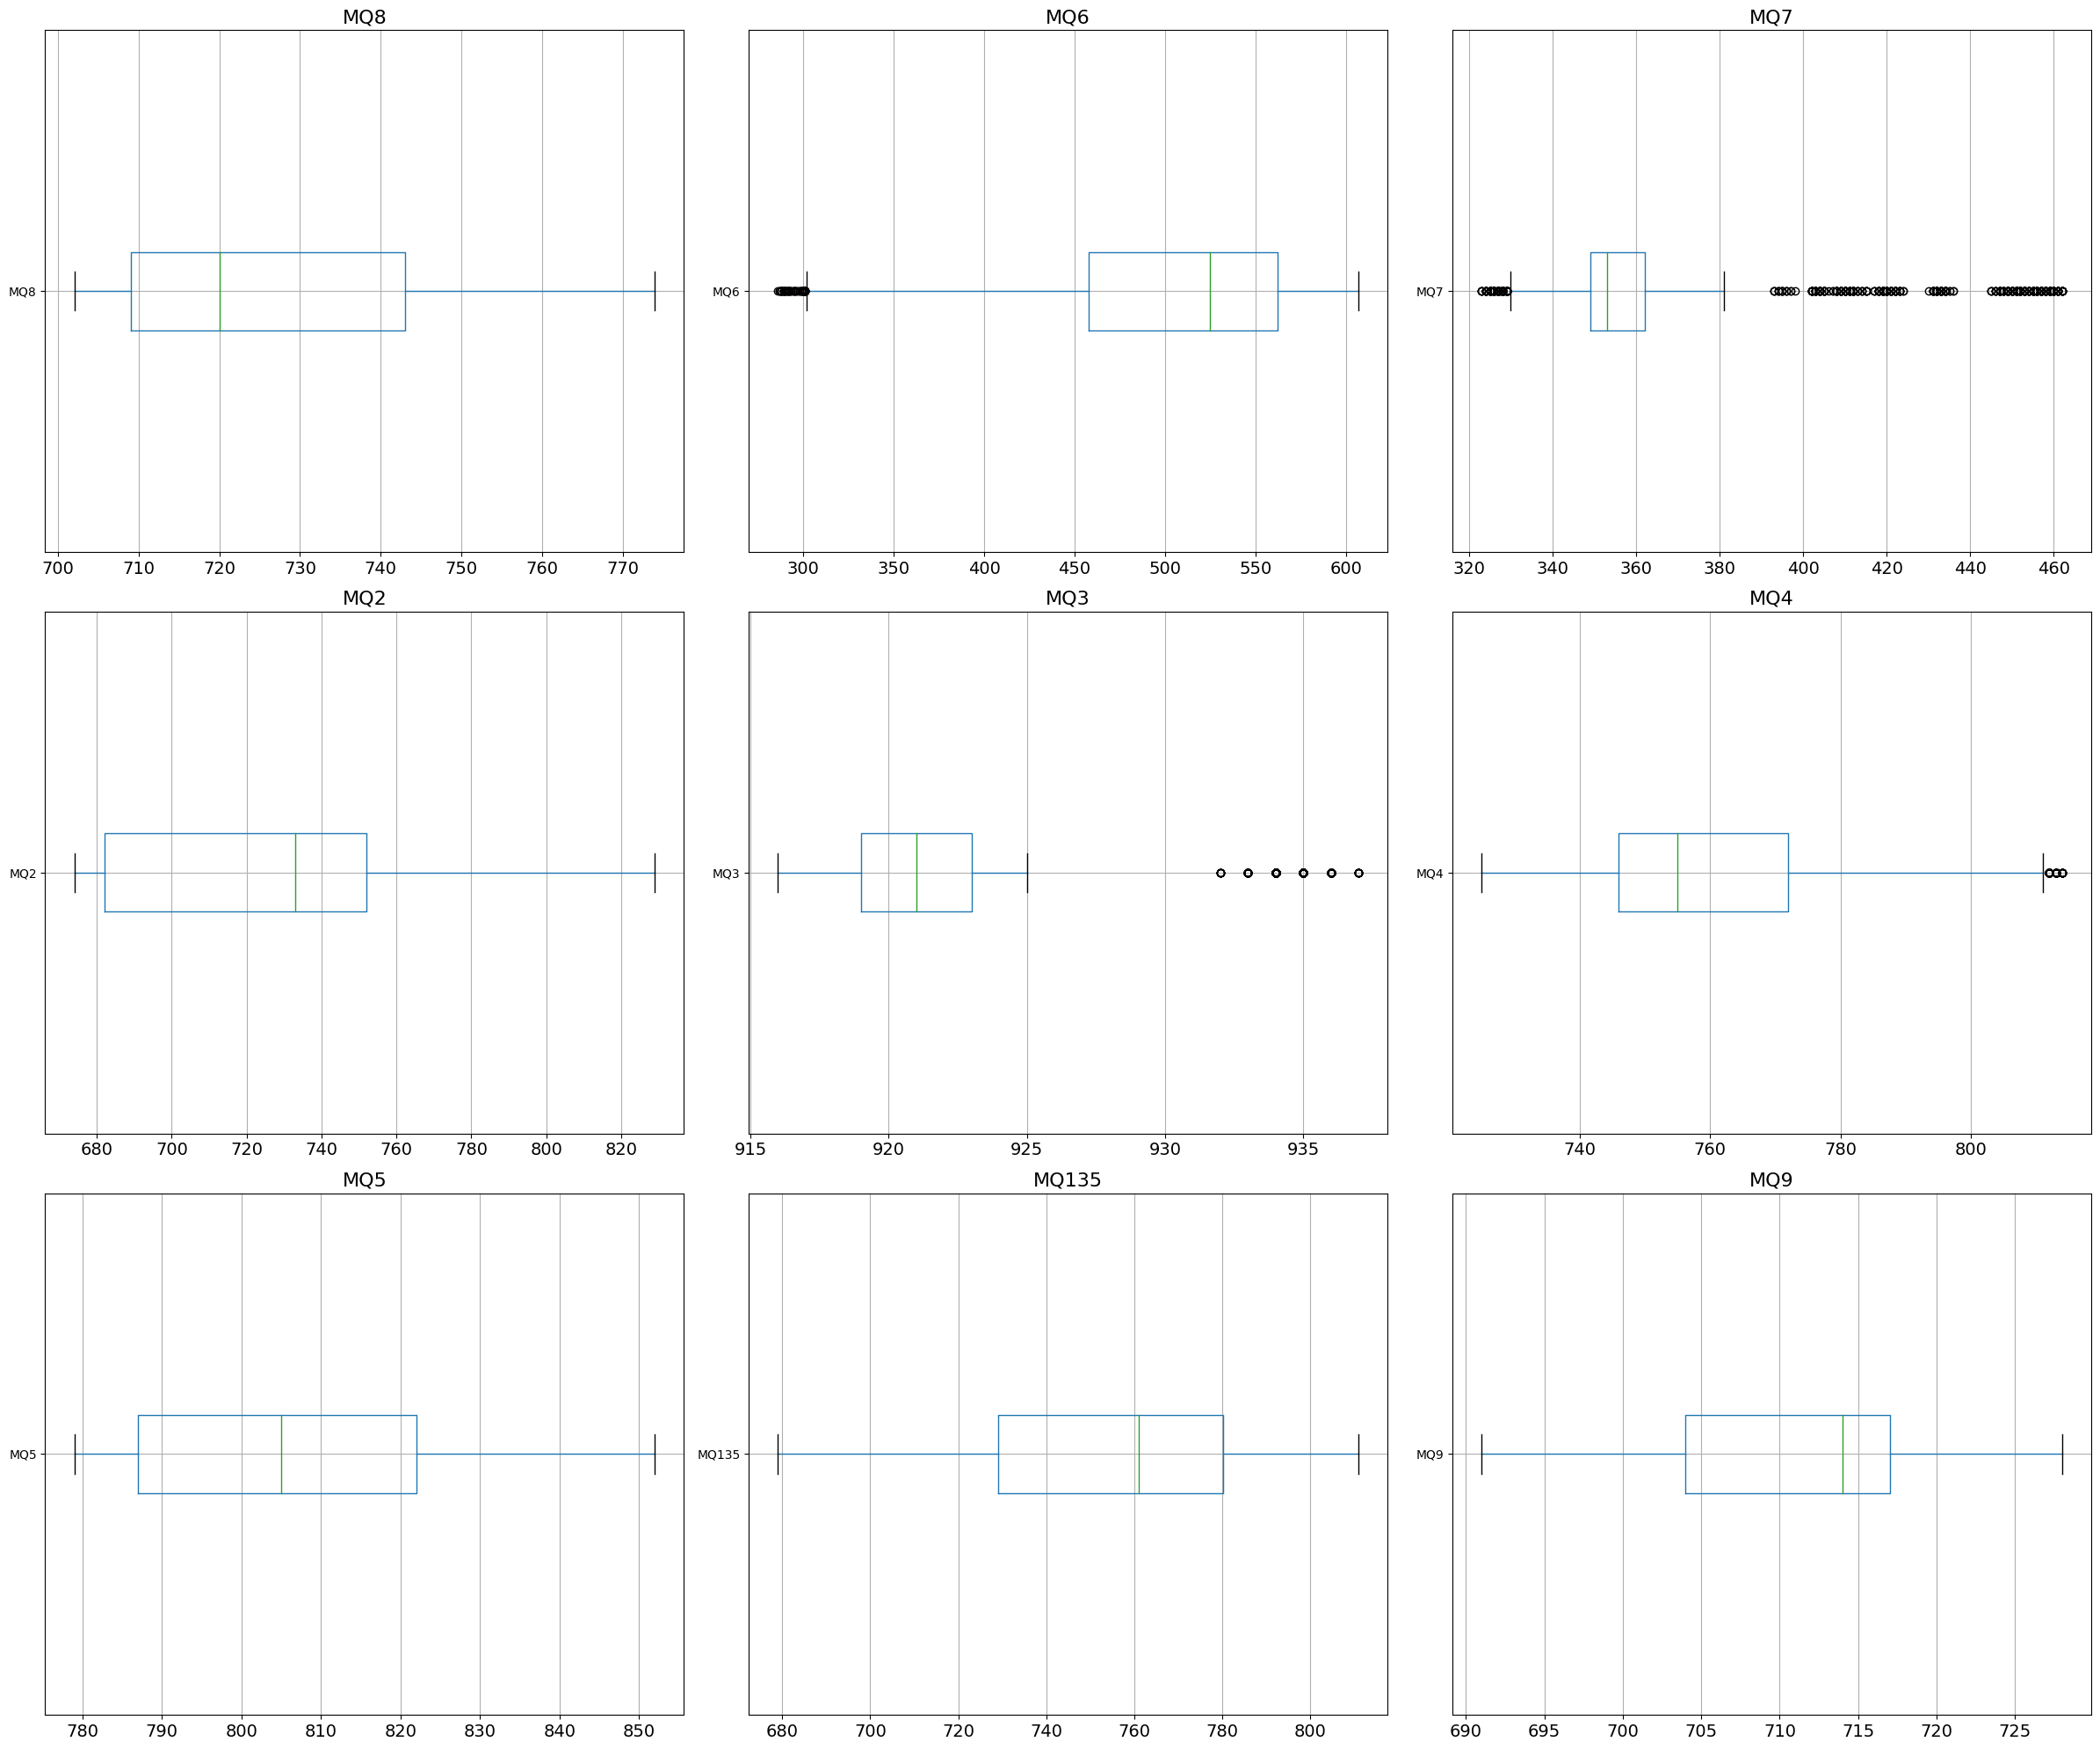

In [46]:
# draw boxplots to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(24, 20))

# List of columns to plot
columns = ['MQ8', 'MQ6', 'MQ7', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ135', 'MQ9']

# Loop through each subplot and assign the respective boxplot
for i, ax in enumerate(axes.flat):
    if i < len(columns):  # Ensure we only plot existing columns
        df.boxplot(column=columns[i], ax=ax, vert=False)  # Horizontal boxplot
        ax.set_title(columns[i], fontsize=16)  # Put the column label on top
        ax.set_xlabel('')  # Remove the x-axis label
        ax.tick_params(axis='x', labelsize=14)  # Increase font size of x-axis ticks

# Adjust layout and display
plt.tight_layout()
plt.show()


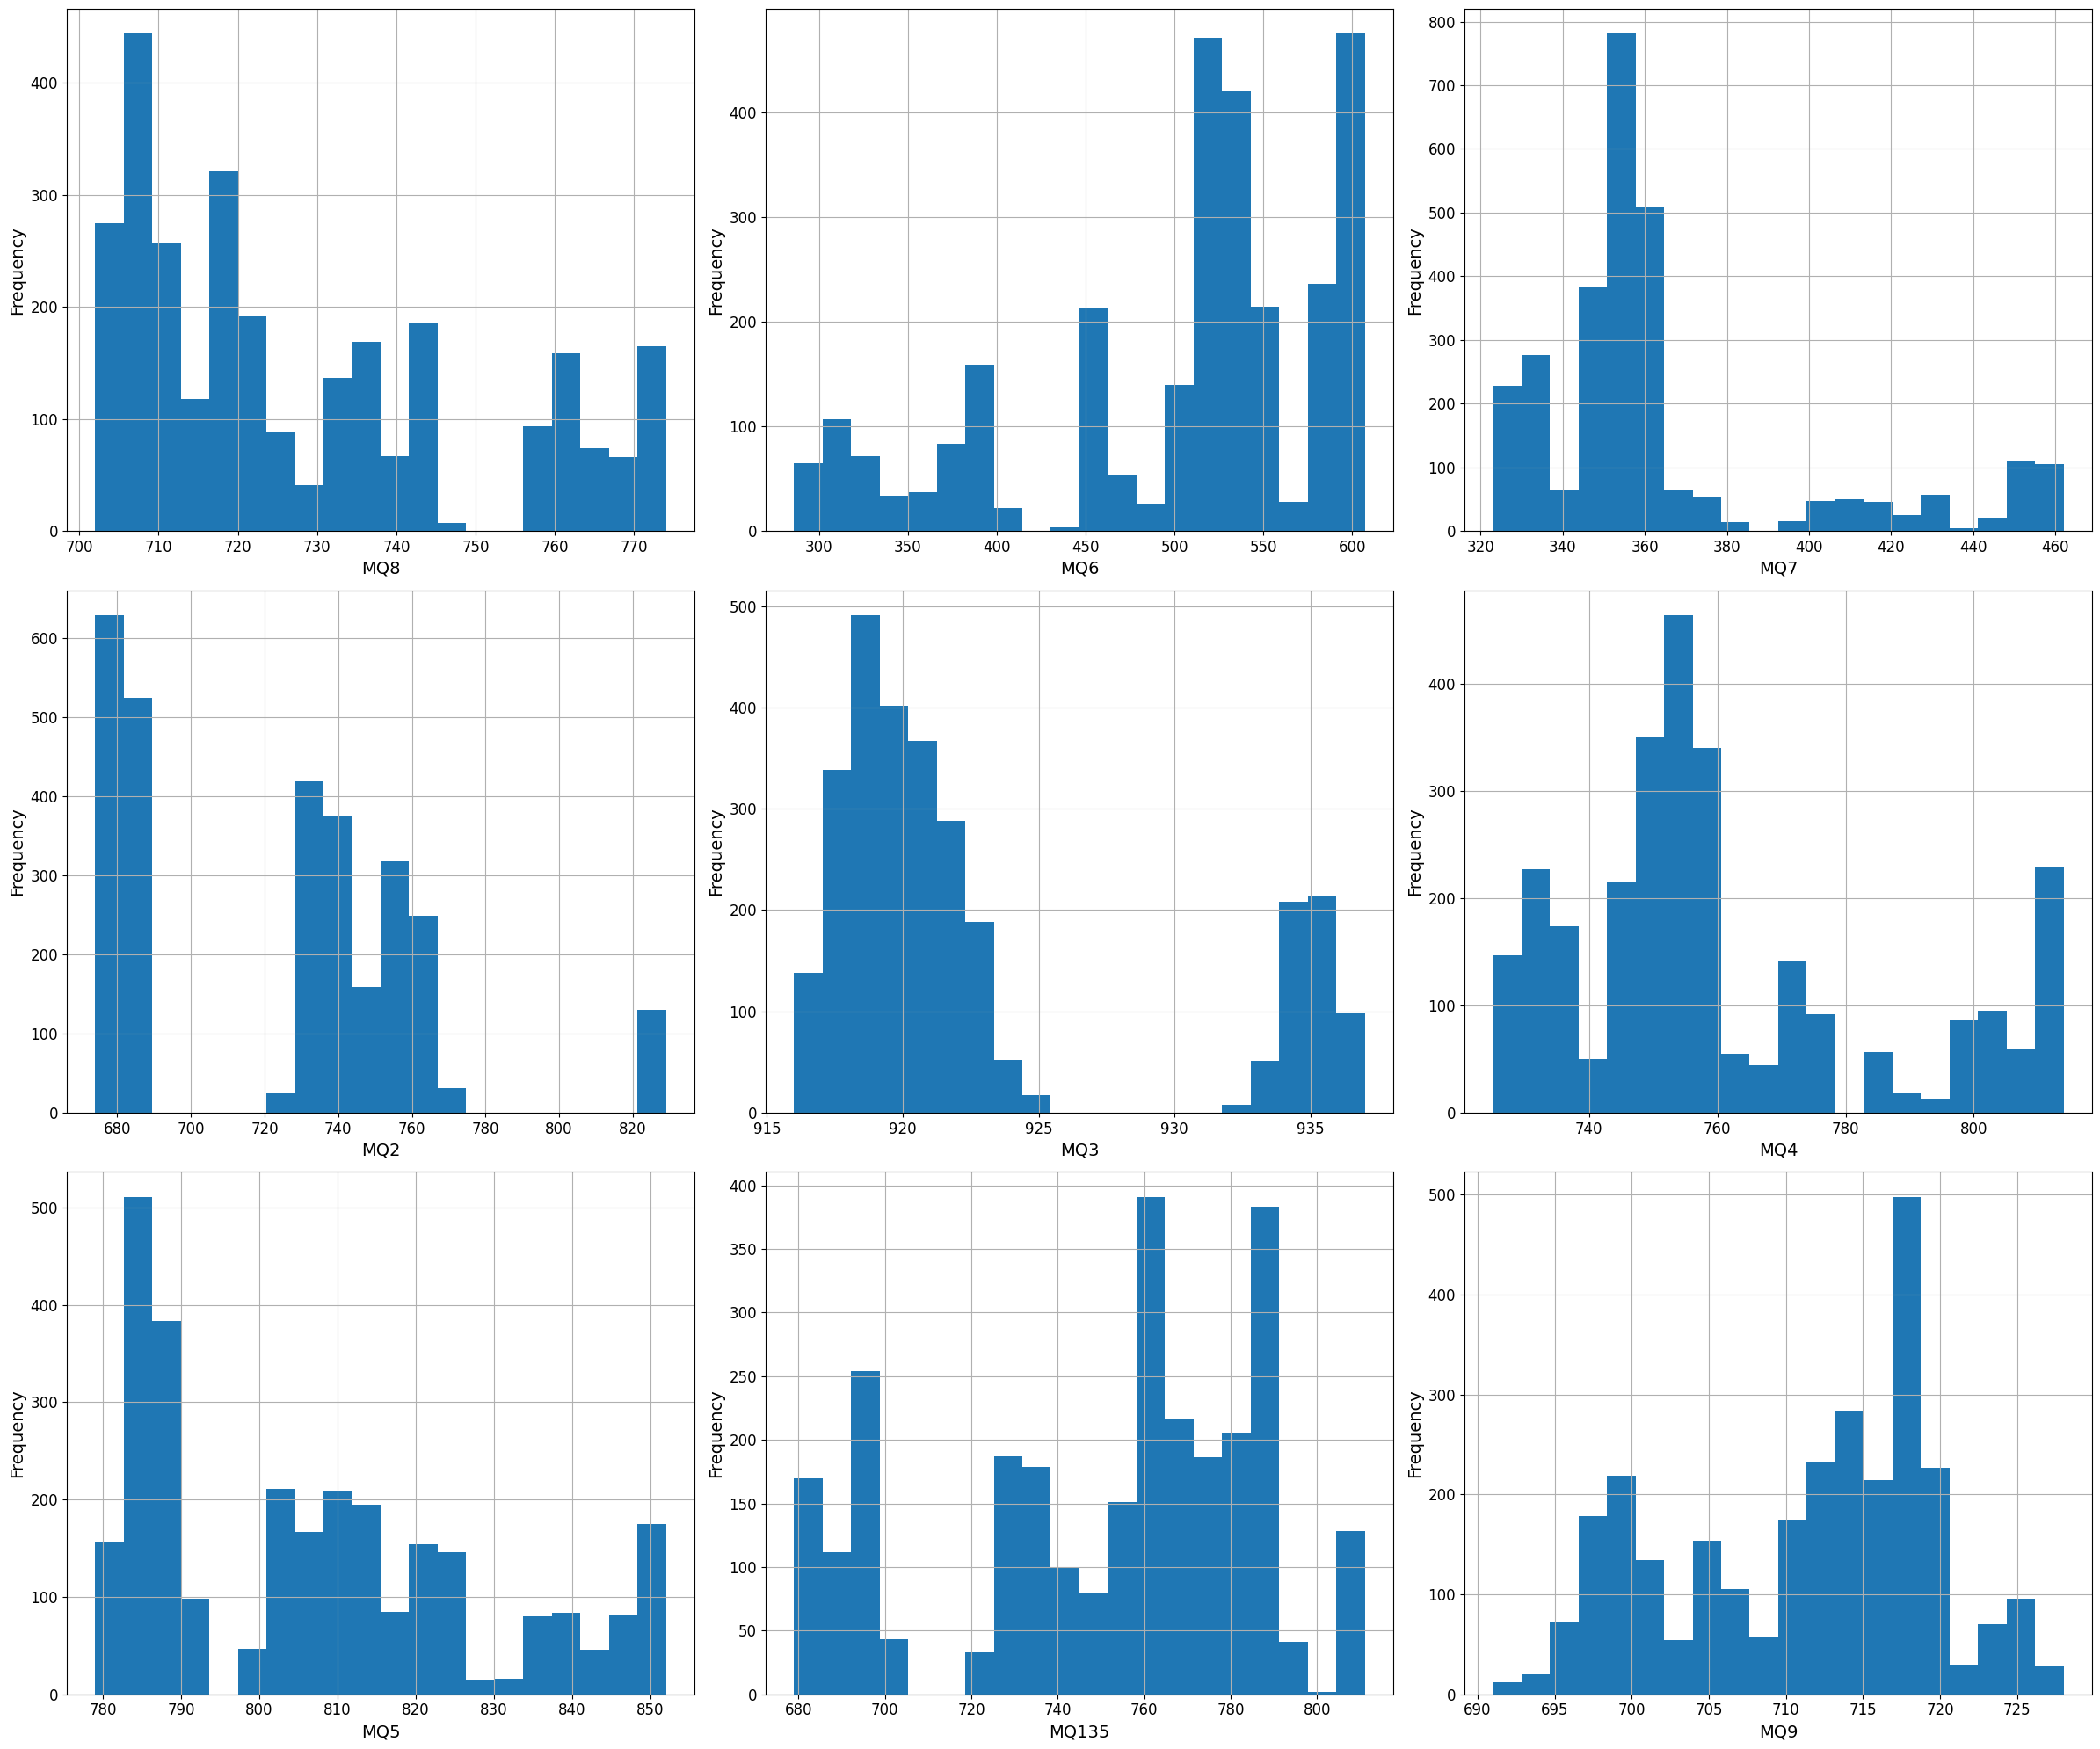

In [47]:
# plot histogram to check distribution of MQ sensors

fig, axes = plt.subplots(3, 3, figsize=(24, 20))

# List of MQ sensor columns
# columns = ['MQ8', 'MQ6', 'MQ7', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ135', 'MQ9']

# Loop through each subplot and plot the histogram for each column
for i, ax in enumerate(axes.flat):
    if i < len(columns):  # Ensure we only plot existing columns
        df[columns[i]].hist(bins=20, ax=ax)  # Plot histogram
        ax.set_xlabel(columns[i], fontsize=14)  # Set x-axis label with larger font
        ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label
        ax.tick_params(axis='x', labelsize=12)  # Increase font size for x-axis ticks
        ax.tick_params(axis='y', labelsize=12)  # Increase font size for y-axis ticks

# Adjust layout and display
plt.tight_layout()
plt.show()


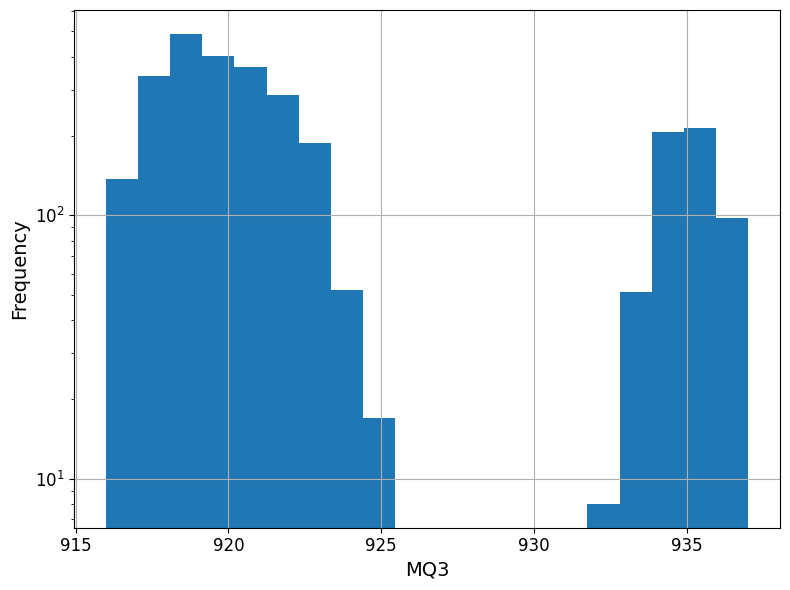

In [48]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [49]:
# Remove rows where MQ3 value is greater than 2000
df = df[df['MQ3'] <= 2000]

# Verify that rows have been removed
print(df.shape)


(2860, 15)


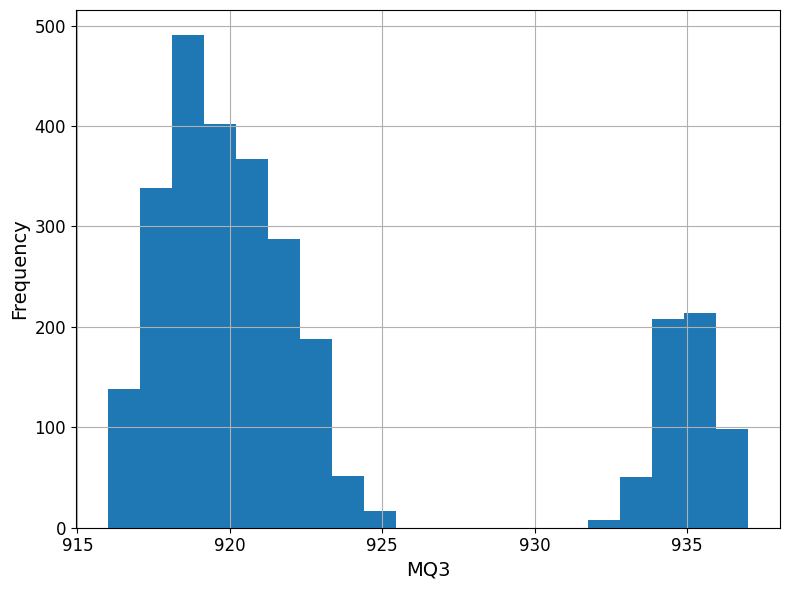

In [50]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [51]:
# Count the rows where MQ3 value is less than or equal to 600
count_mq3_leq_600 = df[df['MQ3'] <= 600].shape[0]

# Display the result
print(f"Number of rows where MQ3 value is <= 600: {count_mq3_leq_600}")


Number of rows where MQ3 value is <= 600: 0


In [52]:
# Drop rows where MQ3 value is less than or equal to 600
df = df[df['MQ3'] > 600]

# Verify that the rows have been removed
print(df.shape)


(2860, 15)


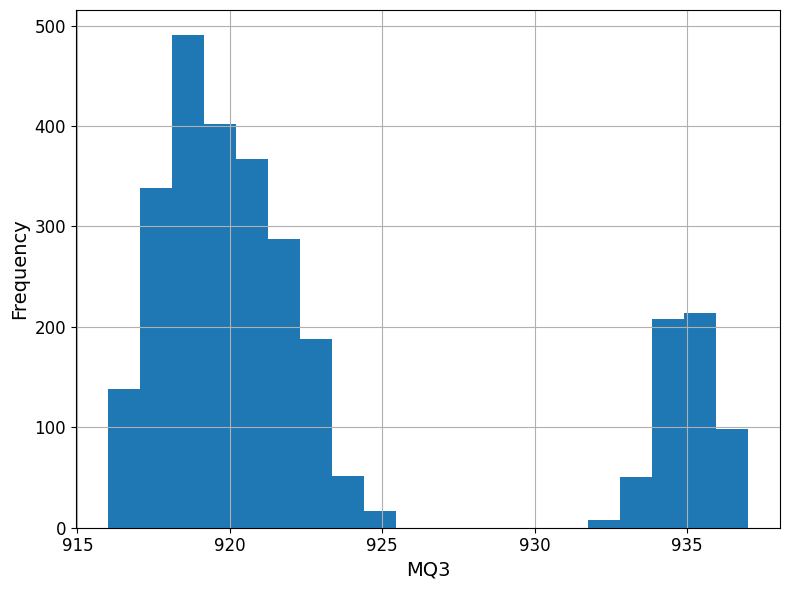

In [53]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()



In [54]:
# Count the rows where MQ3 value is less than or equal to 600
count_mq3_leq_600 = df[df['MQ3'] <= 900].shape[0]

# Display the result
print(f"Number of rows where MQ3 value is <= 900: {count_mq3_leq_600}")


Number of rows where MQ3 value is <= 900: 0


In [55]:
# Drop rows where MQ3 value is less than or equal to 600
df = df[df['MQ3'] > 900]

# Verify that the rows have been removed
print(df.shape)


(2860, 15)


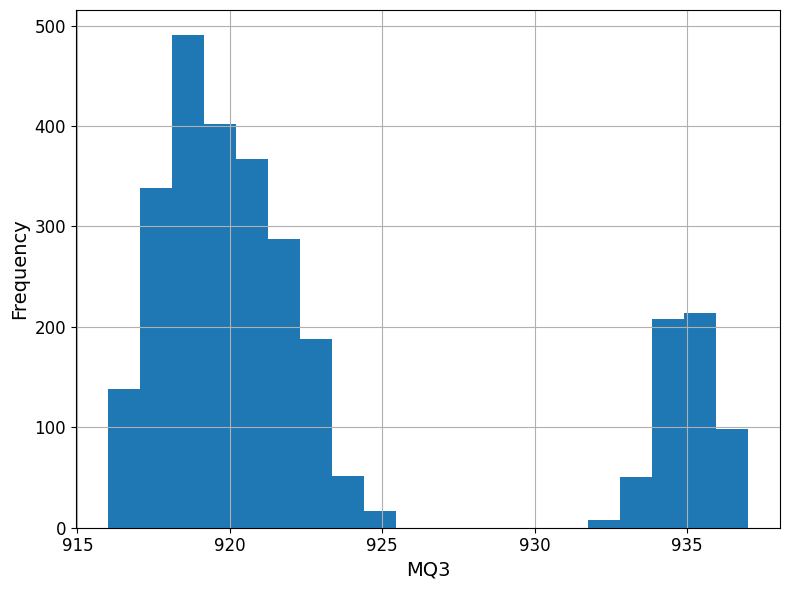

In [56]:
# plot histogram for MQ3 with logarithmic y-axis

plt.figure(figsize=(8, 6))

# Plot histogram for MQ3
df['MQ3'].hist(bins=20)

# Set labels
plt.xlabel('MQ3', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set y-axis to logarithmic scale
# plt.yscale('log')

# Increase tick font size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()



In [57]:
# Must drop time stamp column:
# Drop a column from the DataFrame
df = df.drop(columns=['yyyy-mm-dd timestamp'])

# Alternatively, you can specify the axis
# df = df.drop('column_name', axis=1)

# Verify the DataFrame
print(df.head())


   MQ6  MQ5  MQ4  MQ7    MQ3  MQ8  MQ2  MQ135  MQ9  BMPTemperature  \
0  523  786  734  329  919.0  708  757    730  701           33.63   
1  522  787  734  329  920.0  708  757    729  702           33.64   
2  522  788  733  327  918.0  708  757    729  701           33.65   
3  520  787  735  330  919.0  708  759    730  703           33.65   
4  522  787  733  327  919.0  708  757    729  701           33.65   

   Pressure(Pa)  DHTTemperature  Humidity                      Target  
0      83651.91            34.0      69.0  BlackTie2309(25degEnvTemp)  
1      83534.57            34.0      69.0  BlackTie2309(25degEnvTemp)  
2      83470.77            34.0      69.0  BlackTie2309(25degEnvTemp)  
3      83284.33            34.0      69.0  BlackTie2309(25degEnvTemp)  
4      83242.10            34.0      69.0  BlackTie2309(25degEnvTemp)  


# Split Data

In [58]:
X = df.drop(['Target'], axis=1)

y = df['Target']

In [59]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2288, 13), (572, 13))

# Feature Scaling

In [61]:
cols = X_train.columns

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
count,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03,2.288000e+03
mean,1.149042e-16,1.794990e-15,3.167629e-16,6.152809e-16,3.666842e-15,-2.555842e-15,-1.079168e-15,-1.579933e-15,-4.891192e-16,9.956294e-15,1.128895e-14,-5.998310e-15,-4.844610e-16
std,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00,1.000219e+00
min,-2.489938e+00,-1.318823e+00,-1.460530e+00,-1.187311e+00,-1.151141e+00,-1.199538e+00,-1.218671e+00,-2.000498e+00,-2.432775e+00,-1.648003e+00,-1.420438e+00,-6.845067e-01,-1.424958e+00
25%,-5.032036e-01,-9.429666e-01,-5.995649e-01,-4.356000e-01,-6.540707e-01,-8.766617e-01,-1.017776e+00,-5.863730e-01,-8.710271e-01,-1.226065e+00,-6.971675e-01,-6.845067e-01,-6.740820e-01
50%,2.662253e-01,-5.030852e-02,-2.305798e-01,-3.199522e-01,-3.226904e-01,-3.692841e-01,2.378162e-01,2.843936e-01,3.303172e-01,2.698976e-01,-1.722736e-01,-6.845067e-01,7.679416e-02
75%,8.404260e-01,7.014035e-01,4.663920e-01,-5.974463e-02,8.690045e-03,6.915963e-01,7.400530e-01,8.416842e-01,6.907205e-01,8.836258e-01,4.643129e-01,1.460906e+00,4.522323e-01
max,1.196430e+00,2.110864e+00,2.188322e+00,2.831451e+00,2.328353e+00,2.121478e+00,2.673665e+00,1.677620e+00,2.012199e+00,1.574070e+00,5.569627e+00,1.460906e+00,1.953985e+00


In [64]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


In [65]:
sophie_test_df = pd.read_csv("SophieTest2309(25degEnvTemp).csv")

sophie_test_df.head()

,yyyy-mm-dd timestamp,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
0,2024-09-23 14:49:40,557,780,715,377,914,696,723,628,706,33.31,83772.42,34.0,69.0
1,2024-09-23 14:49:41,557,779,714,375,914,694,724,630,705,33.34,84110.44,34.0,69.0
2,2024-09-23 14:49:42,556,780,714,375,916,695,724,629,704,33.35,83861.02,34.0,69.0
3,2024-09-23 14:49:42,557,779,715,377,915,695,724,632,705,33.36,83934.24,34.0,69.0
4,2024-09-23 14:49:43,557,778,714,378,914,696,724,630,703,33.36,83983.10,34.0,69.0


In [66]:
sophie_test_df = sophie_test_df.drop(columns=['yyyy-mm-dd timestamp'])

y = np.full(len(sophie_test_df), "Sophie2309(25degEnvTemp)")

In [67]:
X = scaler.transform(X)

In [68]:
y_pred=svc.predict(sophie_test_df)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y, y_pred)))

Model accuracy score with default hyperparameters: 0.0000
